# Importing Libraries

In [1]:
import warnings
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
nltk.download('punkt')
nltk.download('stopwords')

warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to C:\Users\Carly
[nltk_data]     Brady\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to C:\Users\Carly
[nltk_data]     Brady\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


# Reading the dataset using pandas library

In [2]:
data = pd.read_csv('olid-training-v1.0.tsv',sep='\t')

In [3]:
#Diaplaying the dataset
data

,id,tweet,subtask_a,subtask_b,subtask_c
0,86426,@USER She should ask a few native Americans wh...,OFF,UNT,NaN
1,90194,@USER @USER Go home you’re drunk!!! @USER #MAG...,OFF,TIN,IND
2,16820,Amazon is investigating Chinese employees who ...,NOT,NaN,NaN
3,62688,"@USER Someone should'veTaken"" this piece of sh...",OFF,UNT,NaN
4,43605,@USER @USER Obama wanted liberals &amp; illega...,NOT,NaN,NaN
...,...,...,...,...,...
13235,95338,@USER Sometimes I get strong vibes from people...,OFF,TIN,IND
13236,67210,Benidorm ✅ Creamfields ✅ Maga ✅ Not too sh...,NOT,NaN,NaN
13237,82921,@USER And why report this garbage. We don't g...,OFF,TIN,OTH
13238,27429,@USER Pussy,OFF,UNT,NaN


In [4]:
# Data Preprocessing
def preprocess_text(text):
    # Tokenize the text
    tokens = word_tokenize(text)
    # Convert to lower case
    tokens = [word.lower() for word in tokens]
    # Remove punctuation
    tokens = [word for word in tokens if word.isalnum()]
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)


In [5]:
#Performing data cleaning on the tweet column
data['clean_tweet'] = data['tweet'].apply(preprocess_text)

In [6]:
#Displaying the dataset
data

,id,tweet,subtask_a,subtask_b,subtask_c,clean_tweet
0,86426,@USER She should ask a few native Americans wh...,OFF,UNT,NaN,user ask native americans take
1,90194,@USER @USER Go home you’re drunk!!! @USER #MAG...,OFF,TIN,IND,user user go home drunk user maga trump2020 url
2,16820,Amazon is investigating Chinese employees who ...,NOT,NaN,NaN,amazon investigating chinese employees selling...
3,62688,"@USER Someone should'veTaken"" this piece of sh...",OFF,UNT,NaN,user someone piece shit volcano
4,43605,@USER @USER Obama wanted liberals &amp; illega...,NOT,NaN,NaN,user user obama wanted liberals amp illegals m...
...,...,...,...,...,...,...
13235,95338,@USER Sometimes I get strong vibes from people...,OFF,TIN,IND,user sometimes get strong vibes people man vib...
13236,67210,Benidorm ✅ Creamfields ✅ Maga ✅ Not too sh...,NOT,NaN,NaN,benidorm creamfields maga shabby summer
13237,82921,@USER And why report this garbage. We don't g...,OFF,TIN,OTH,user report garbage give crap
13238,27429,@USER Pussy,OFF,UNT,NaN,user pussy


In [7]:
# Splitting the dataset and asigning the tweets to X variable and the target to y variable
X = data['clean_tweet']
y = data['subtask_a']

In [8]:
#Displaying the tweets
X

0                           user ask native americans take
1          user user go home drunk user maga trump2020 url
2        amazon investigating chinese employees selling...
3                          user someone piece shit volcano
4        user user obama wanted liberals amp illegals m...
                               ...                        
13235    user sometimes get strong vibes people man vib...
13236              benidorm creamfields maga shabby summer
13237                        user report garbage give crap
13238                                           user pussy
13239    spanishrevenge justice humanrights freedomofex...
Name: clean_tweet, Length: 13240, dtype: object

In [9]:
# Feature extraction
vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = vectorizer.fit_transform(X).toarray()

<Axes: xlabel='subtask_a', ylabel='count'>

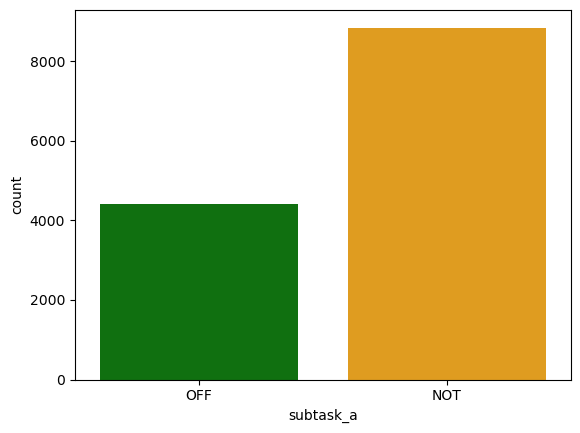

In [10]:
#Ploting a count plot on the target to see the number of occurence for both offensive tweets and non offensive tweets
import seaborn as sns
sns.countplot(x=y, palette=['green','orange'])

In [11]:
#Performing over sampling on the dataset
from imblearn.over_sampling import RandomOverSampler

In [12]:
over_sampler = RandomOverSampler(sampling_strategy='auto',random_state=44)

In [13]:
#Assigning the over sampled data on variable x_over and y_over
x_over,y_over = over_sampler.fit_resample(X_tfidf,y)

<Axes: xlabel='subtask_a', ylabel='count'>

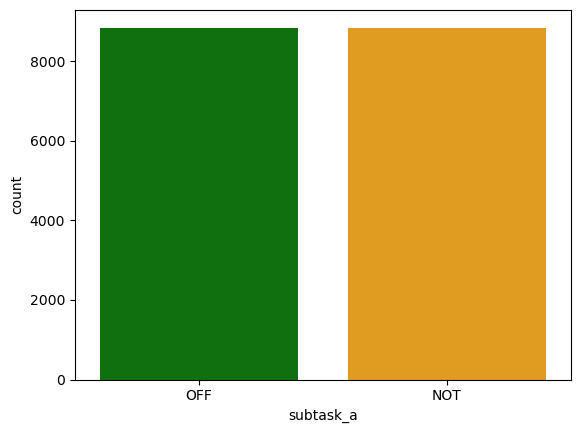

In [14]:
#Displaying the balanced data after over sampling
sns.countplot(x=y_over, palette=['green','orange'])

In [15]:
#Assigning 80% of the dataset for training and 20% of the dataset for testing
X_train, X_test, y_train, y_test = train_test_split(x_over,y_over, test_size=0.2, random_state=42,stratify=y_over)

In [16]:
#Using label encoder for transforming the target column to numerical digits
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [17]:
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

In [18]:
# Normalize the data using StandardScaler
scaler = StandardScaler()
Xtrain_scaled = scaler.fit_transform(X_train)
Xtest_scaled = scaler.fit_transform(X_test)

In [19]:
# Define the models
models = {
    "Gradient Descent": SGDClassifier(max_iter=1000, tol=1e-3),
    "Bernoulli Naive Bayes": BernoulliNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

In [20]:
# Evaluate the models using k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [21]:
#Importing matplotlib for data transcformation
import matplotlib.pyplot as plt

Evaluating Gradient Descent with k-fold cross-validation
Accuracy: 0.7542 (+/- 0.0111)
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.74      0.72      1768
           1       0.73      0.69      0.71      1768

    accuracy                           0.72      3536
   macro avg       0.72      0.72      0.72      3536
weighted avg       0.72      0.72      0.72      3536

Confusion Matrix:


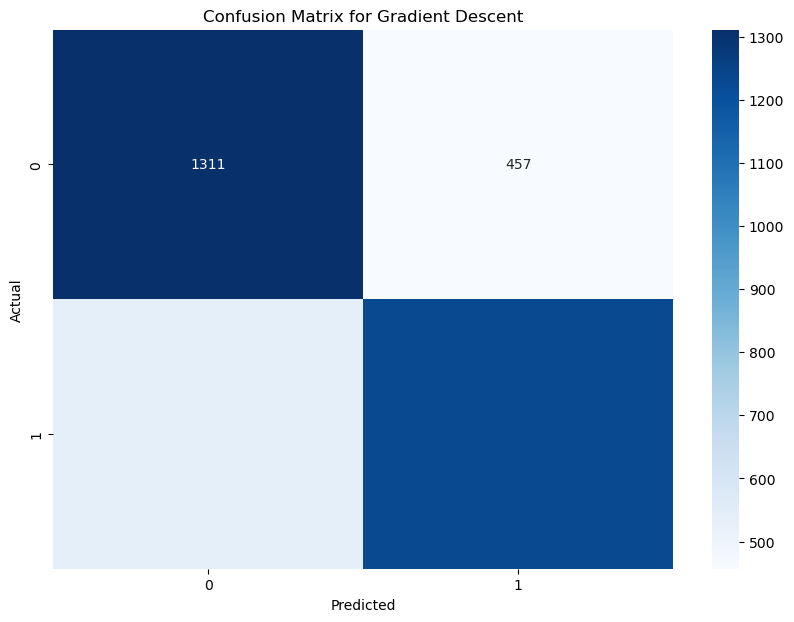



Evaluating Bernoulli Naive Bayes with k-fold cross-validation
Accuracy: 0.7497 (+/- 0.0121)
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.78      0.76      1768
           1       0.77      0.72      0.74      1768

    accuracy                           0.75      3536
   macro avg       0.75      0.75      0.75      3536
weighted avg       0.75      0.75      0.75      3536

Confusion Matrix:


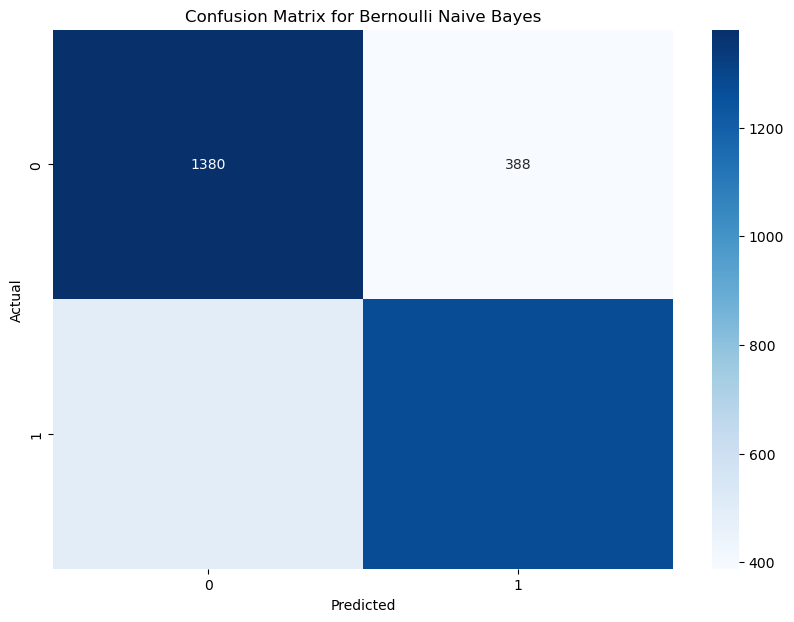



Evaluating Logistic Regression with k-fold cross-validation
Accuracy: 0.7571 (+/- 0.0091)
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.73      0.72      1768
           1       0.73      0.71      0.72      1768

    accuracy                           0.72      3536
   macro avg       0.72      0.72      0.72      3536
weighted avg       0.72      0.72      0.72      3536

Confusion Matrix:


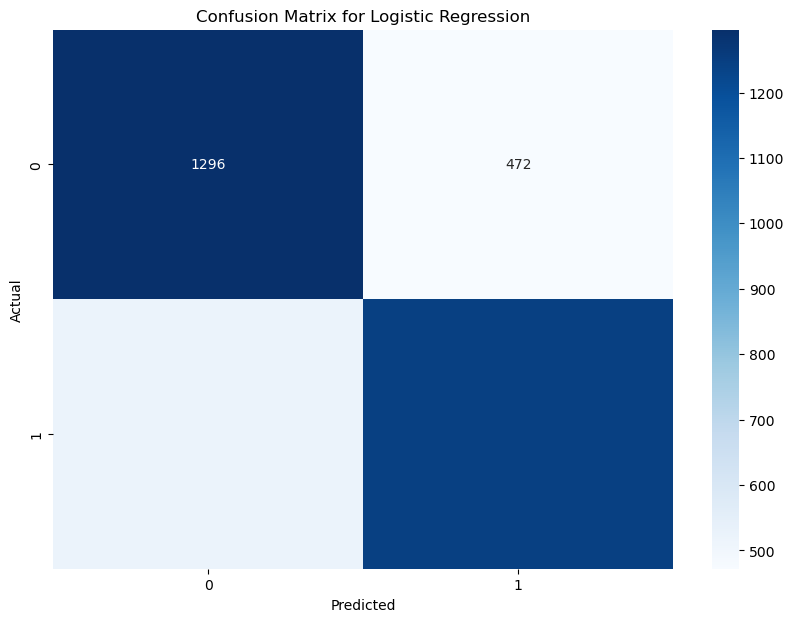



Evaluating Random Forest with k-fold cross-validation
Accuracy: 0.8498 (+/- 0.0080)
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.88      0.86      1768
           1       0.87      0.85      0.86      1768

    accuracy                           0.86      3536
   macro avg       0.86      0.86      0.86      3536
weighted avg       0.86      0.86      0.86      3536

Confusion Matrix:


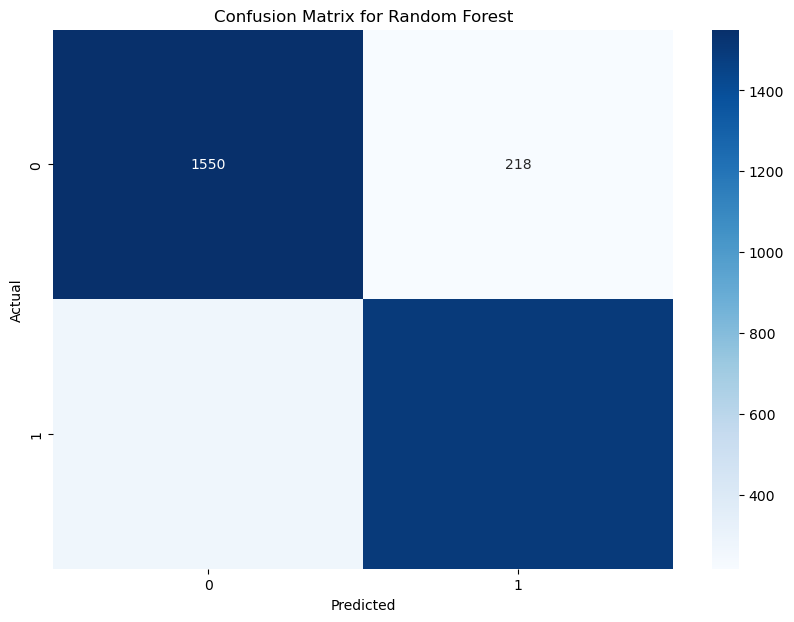

In [22]:
for model_name, model in models.items():
    print(f"Evaluating {model_name} with k-fold cross-validation")
    accuracy = cross_val_score(model, Xtrain_scaled,y_train, cv=kf, scoring='accuracy')
    print(f"Accuracy: {accuracy.mean():.4f} (+/- {accuracy.std() * 2:.4f})")
    # Train the model and evaluate on the entire dataset for classification report
    model.fit(Xtrain_scaled,y_train)
    y_pred = model.predict(Xtest_scaled)
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
     # Generate the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()
    print("\n")

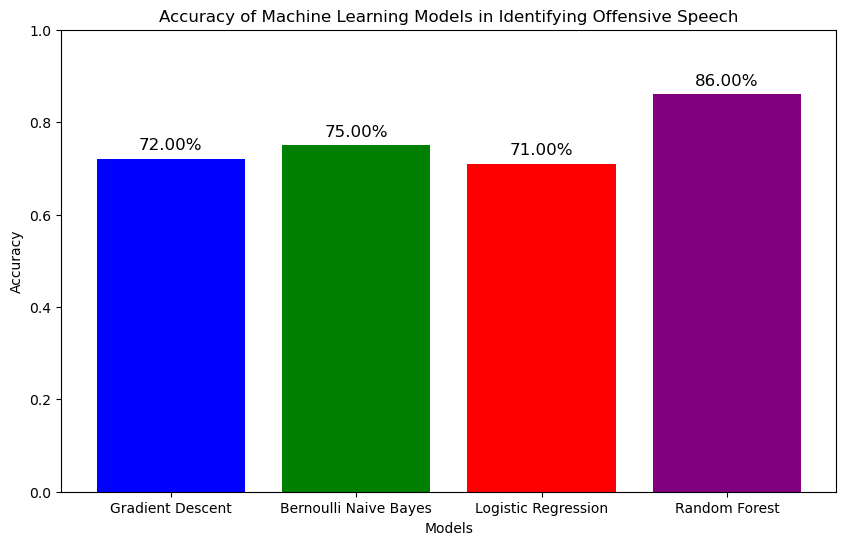

In [23]:
import matplotlib.pyplot as plt

# Model names and their accuracies
models = ["Gradient Descent", "Bernoulli Naive Bayes", "Logistic Regression", "Random Forest"]
accuracies = [0.72, 0.75, 0.71, 0.86]

# Create the plot
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'red', 'purple'])

# Adding titles and labels
plt.title('Accuracy of Machine Learning Models in Identifying Offensive Speech')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Ensure the y-axis goes from 0 to 1
plt.axhline(y=0.5, color='gray', linestyle='')  # Adding a reference line at 0.5

# Display the accuracy values on top of the bars
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.02, f"{acc * 100:.2f}%", ha='center', fontsize=12)

# Show the plot
plt.show()
